## Importing Modules

In [6]:
import re
import nltk
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Downloading required data
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Downloading & Loading NLTK modelus
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
df = pd.read_csv("/clean_data.csv")

df.head()

,year,artist,genre,lyrics_clean,len
0,2009,beyonce-knowles,7,oh baby know gonna cut right chase woman made ...,966
1,2009,beyonce-knowles,7,playin everything easy like seem sure still wa...,668
2,2009,beyonce-knowles,7,search tenderness hard find love need live loo...,462
3,2009,beyonce-knowles,7,oh oh oh oh oh oh verse 1 wrote book stand tit...,1230
4,2009,beyonce-knowles,7,party people people party popping sitting arou...,887


In [9]:
df.dropna(axis=0,inplace=True)
df

,year,artist,genre,lyrics_clean,len
0,2009,beyonce-knowles,7,oh baby know gonna cut right chase woman made ...,966
1,2009,beyonce-knowles,7,playin everything easy like seem sure still wa...,668
2,2009,beyonce-knowles,7,search tenderness hard find love need live loo...,462
3,2009,beyonce-knowles,7,oh oh oh oh oh oh verse 1 wrote book stand tit...,1230
4,2009,beyonce-knowles,7,party people people party popping sitting arou...,887
...,...,...,...,...,...
192678,2012,edens-edge,0,got texas way walking got sexy way talking let...,581
192679,2012,edens-edge,0,gotta say boy couple date hand outright blowin...,997
192680,2012,edens-edge,0,look couple corner booth look lot like looking...,616
192681,2012,edens-edge,0,fly mortal earth measured depth girth father s...,508


## Loading Data

In [10]:
df.columns

Index(['year', 'artist', 'genre', 'lyrics_clean', 'len'], dtype='object')

In [11]:
# df.drop("Unnamed: 0",axis=1,inplace=True)
df

,year,artist,genre,lyrics_clean,len
0,2009,beyonce-knowles,7,oh baby know gonna cut right chase woman made ...,966
1,2009,beyonce-knowles,7,playin everything easy like seem sure still wa...,668
2,2009,beyonce-knowles,7,search tenderness hard find love need live loo...,462
3,2009,beyonce-knowles,7,oh oh oh oh oh oh verse 1 wrote book stand tit...,1230
4,2009,beyonce-knowles,7,party people people party popping sitting arou...,887
...,...,...,...,...,...
192678,2012,edens-edge,0,got texas way walking got sexy way talking let...,581
192679,2012,edens-edge,0,gotta say boy couple date hand outright blowin...,997
192680,2012,edens-edge,0,look couple corner booth look lot like looking...,616
192681,2012,edens-edge,0,fly mortal earth measured depth girth father s...,508


In [12]:
input_feature = df.drop(['year','genre','len','artist'],axis=1)
output_feature = df.genre

In [13]:
input_feature

,lyrics_clean
0,oh baby know gonna cut right chase woman made ...
1,playin everything easy like seem sure still wa...
2,search tenderness hard find love need live loo...
3,oh oh oh oh oh oh verse 1 wrote book stand tit...
4,party people people party popping sitting arou...
...,...
192678,got texas way walking got sexy way talking let...
192679,gotta say boy couple date hand outright blowin...
192680,look couple corner booth look lot like looking...
192681,fly mortal earth measured depth girth father s...


In [14]:
len(set(output_feature))

10

In [15]:
import time
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# Importing Evaluation matrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [16]:
text1 = []

for label in input_feature['lyrics_clean']:
    if type(label)==list:
        for i in label:
            text1.append(i)
    elif type(label) == str:
        text1.append(label)

In [18]:
#word2vec
from gensim.models import Word2Vec
w2v = Word2Vec([text1], min_count=1,workers=3,window =3,sg = 1)

In [19]:
#applyword2vec
I = []

for label in input_feature['lyrics_clean']:
    ind=[]
    if type(label)==list:

        for i in label:
            vec=w2v.wv[i]
            ind.append(list(vec))
        
        
        I.append(vec)
    elif type(label) == str:
        vec=w2v.wv[label]
        I.append(vec)

In [20]:
import numpy as np
embed = np.array(I, dtype=object)

In [21]:
embed.shape

(192680, 100)

In [22]:
len(embed[1])

100

In [23]:
embed.shape

(192680, 100)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint


from sklearn.naive_bayes import GaussianNB
vectorizers = [ Word2vec
               ]

samplers = [RandomOverSampler()]
models = []

models.append(('Random Forest', RandomForestClassifier()))
models.append(('ANN', None))







+ ==================================================================================================== +
			1-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  Word2vec
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.974541168055297
--------------------------------------------------
F1 :  [0.99738598 0.9998358  0.99992702 0.97579821 0.99998175 0.99930662
 0.97577649 0.91721905 0.99968989 0.88516657]
--------------------------------------------------
Reacll :  [0.99558426 1.         1.         0.95865114 1.         0.99934309
 0.95850516 0.87869056 1.         0.95463669]
--------------------------------------------------
Precision :  [0.99919423 0.99967165 0.99985404 0.99356986 0.99996351 0.99927015
 0.99368166 0.95928125 0.99937997 0.82512144]
-----

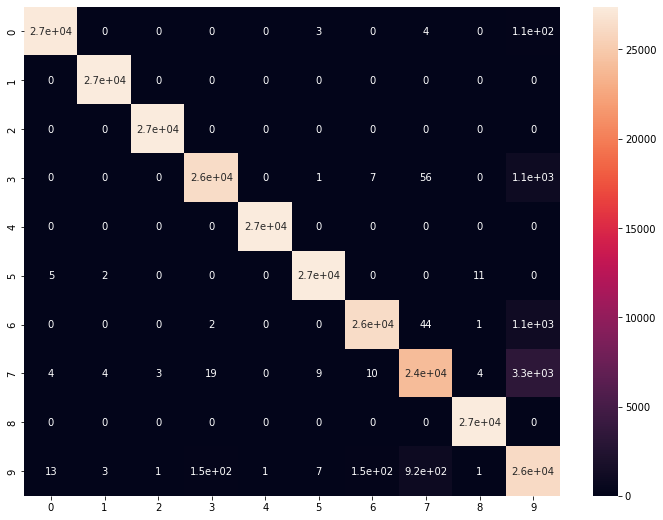

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 1770.727 seconds...
							-----------------------------------------------------------

Epoch 1/10
19980/19980 [==============================] - 55s 3ms/step - loss: 2.3012 - accuracy: 0.1073 - val_loss: 2.2989 - val_accuracy: 0.1145
Epoch 2/10
19980/19980 [==============================] - 54s 3ms/step - loss: 2.2986 - accuracy: 0.1156 - val_loss: 2.2973 - val_accuracy: 0.1202
Epoch 3/10
19980/19980 [==============================] - 63s 3ms/step - loss: 2.2966 - accuracy: 0.1177 - val_loss: 2.2964 - val_accuracy: 0.1179
Epoch 4/10
19980/19980 [==============================] - 53s 3ms/step - loss: 2.2942 - accuracy: 0.1206 - val_loss: 2.2944 - val_accuracy: 0.1190
Epoch 5/10
19980/19980 [==============================] - 53s 3ms/step - loss: 2.2927 - accuracy: 0.1225 - val_loss: 2.2925 - val_accuracy: 0.1218
Epoch 6/10
19980/19980 [==============================] - 52s 3ms

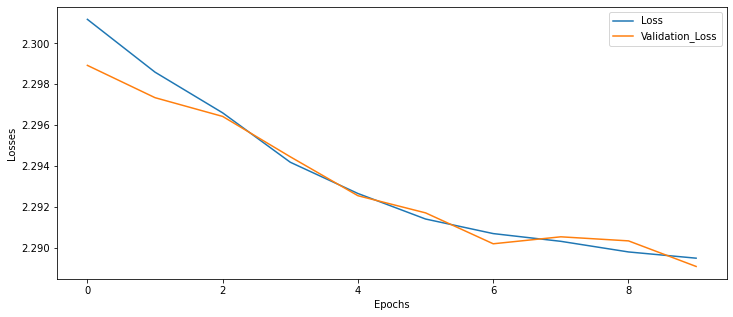

+ ==================================================================================================== +
			2-For ANN The Performance result is: 
+ ==================================================================================================== +
Vectorization Technique :  Word2vec
--------------------------------------------------
Sampling Technique      :  RandomOverSampler
--------------------------------------------------
Accuracy :  0.1274547372185788
--------------------------------------------------
F1 :  [0.03503124 0.10451238 0.24445058 0.12111709 0.16762854 0.11733948
 0.         0.         0.         0.        ]
--------------------------------------------------
Reacll :  [0.020254   0.09331776 0.58194956 0.14941061 0.29203314 0.13758622
 0.         0.         0.         0.        ]
--------------------------------------------------
Precision :  [0.12955182 0.118759   0.1547209  0.1018332  0.117552   0.10228722
 0.         0.         0.         0.        ]
--------------

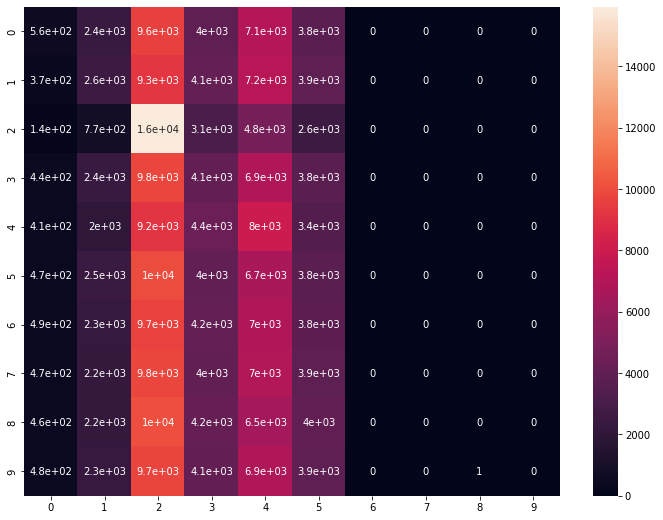

In [25]:
from sklearn.model_selection import train_test_split 
import tensorflow as tf
acc = []
pre = []
rec = []
f1 = []
con = []
vectorization_tec=[]
sampling_tec = []
models_name = []
for vec in vectorizers:
    
    X =embed
    Y = output_feature
    
    for sampler in samplers:
      if sampler:
        X, Y = sampler.fit_resample(X,Y)
      X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,stratify=Y)
      i = 0
      for name, model in models:
        i = i+1
        start_time = time.time()
        if name == "ANN":
          models_name.append(name)
          vectorization_tec.append("Word2Vec")
          if sampler:
            sampling_tec.append(type(sampler).__name__)
          else:
            sampling_tec.append("Original")
            

          y_tr = pd.get_dummies(y_train)
          y_ts = pd.get_dummies(y_test)
                
          mapper = dict([[i, j] for i, j in zip(y_tr.columns, list(range(len(y_tr.columns))))])
                
          ann = Sequential()
          ann.add(Dense(8, activation="relu", input_dim=100))
          ann.add(Dense(16))
          ann.add(Dropout(0.2))
          ann.add(Dense(16))
          ann.add(Dense(y_tr.shape[1], activation="softmax"))
          ann.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
          history = ann.fit(tf.convert_to_tensor(X_train, dtype=tf.float32), y_tr, epochs=10, validation_data=(tf.convert_to_tensor(X_test, dtype=tf.float32), y_ts))
          y_pred = [np.argmax(i) for i in ann.predict(tf.convert_to_tensor(X_test, dtype=tf.float32))]
          y_ts = y_ts.idxmax(axis=1).map(mapper)

          # history = ann.history.history
          print(f'Plotting Losses of {name}...\n')
          plt.figure(figsize=(12,5))

          sns.lineplot(x=list(range(len(history.history["loss"]))), y=history.history["loss"], label="Loss")
          sns.lineplot(x=list(range(len(history.history["loss"]))), y=history.history["val_loss"], label="Validation_Loss")
          plt.xlabel("Epochs")
          plt.ylabel("Losses")
          plt.show()
                # Accuracy
          accuracy = accuracy_score(y_ts, y_pred)
          acc.append(accuracy)
                # Precision
          precision = precision_score(y_ts, y_pred, average=None)
          pre.append(precision)
              
                # Recall
          recall = recall_score(y_ts, y_pred, average=None)
          rec.append(recall)
          # F1 Score
          f1_sco = f1_score(y_ts, y_pred, average=None)
          f1.append(f1_sco)
                # Confusion Matrix
          confusion_mat = confusion_matrix(y_ts, y_pred)
          con.append(confusion_mat)
                # Report
          report = classification_report(y_ts, y_pred)


          print("+","="*100,"+")
          print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
          print("+","="*100,"+")
          print('Vectorization Technique : ', type(vec).__name__)   
          print("-"*50)
          print('Sampling Technique      : ', type(sampler).__name__)   
          print("-"*50)
          print('Accuracy : ', accuracy)   
          print("-"*50)
          print('F1 : ', f1_sco)
          print("-"*50)
          print('Reacll : ', recall)
          print("-"*50)
          print('Precision : ', precision)
          print("-"*50)
          print('Confusion Matrix....\n', confusion_mat)
          print("-"*50)
          print('Classification Report....\n', report)
          print("-"*50)
          print('Plotting Confusion Matrix...\n')
          plt.figure(figsize=(12, 9))
          sns.heatmap(confusion_mat, annot=True)
          plt.show()



          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print()
        
        else:
          # Fitting model to the Training set
          clf = model
          clf.fit(X_train, y_train)

          models_name.append(name)
          vectorization_tec.append("Word2Vec")
          if sampler:
            sampling_tec.append(type(sampler).__name__)
          else:
            sampling_tec.append("original")
          # sampling_tec.append(type(sampler).__name__)
          # predict values
          y_pred = clf.predict(X_test)

                # Accuracy
          accuracy = accuracy_score(y_test, y_pred)
          acc.append(accuracy)
                # Precision
          precision = precision_score(y_test, y_pred, average=None)
          pre.append(precision)
                # Recall
          recall = recall_score(y_test, y_pred, average=None)
          rec.append(recall)
                # F1 Score
          f1_sco = f1_score(y_test, y_pred, average=None)
          f1.append(f1_sco)
                # Confusion Matrix
          confusion_mat = confusion_matrix(y_test, y_pred)
          con.append(confusion_mat)
                # Report
          report = classification_report(y_test, y_pred)


          print("+","="*100,"+")
          print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
          print("+","="*100,"+")
          print('Vectorization Technique : ', type(vec).__name__)   
          print("-"*50)
          print('Sampling Technique      : ', type(sampler).__name__)   
          print("-"*50)
          print('Accuracy : ', accuracy)   
          print("-"*50)
          print('F1 : ', f1_sco)
          print("-"*50)
          print('Reacll : ', recall)
          print("-"*50)
          print('Precision : ', precision)
          print("-"*50)
          print('Confusion Matrix....\n', confusion_mat)
          print("-"*50)
          print('Classification Report....\n', report)
          print("-"*50)
          print('Plotting Confusion Matrix...\n')
          plt.figure(figsize=(12, 9))
          sns.heatmap(confusion_mat, annot=True)
          plt.show()



          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
          print("\t\t\t\t\t\t\t-----------------------------------------------------------")
          print()